In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Predicting Insurance Cost\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
ins = data.copy()

In [6]:
ins['sex'] = ins['sex'].apply(lambda x: 0 if x == 'male' else 1)
ins['smoker'] = ins['smoker'].apply(lambda x: 0 if x == 'no' else 1)
ins['region'] = ins['region'].apply(lambda x: 1 if x == 'northeast' else 2 if x == 'southeast' else 3 if x == 'southwest' else 4)

In [7]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


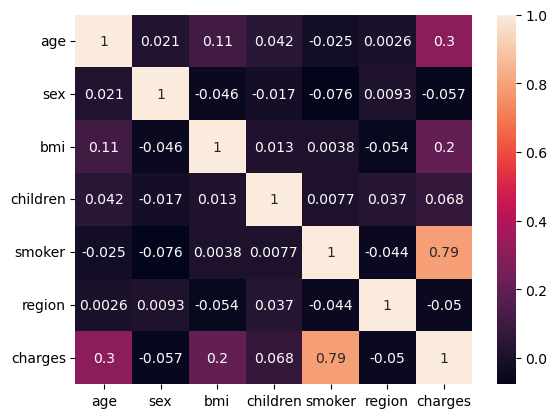

In [8]:
sns.heatmap(ins.corr(), annot=True)
plt.show()

## Predicting Insurance Cost

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
X = ins.drop(columns=['charges', 'sex', 'region'])
y = ins['charges']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 417)

## Linear Regression Model

In [12]:
model_pipeline = Pipeline(steps=[('regressor', LinearRegression())])

In [13]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('regressor', LinearRegression())])

In [14]:
y_pred = model_pipeline.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")

R² Score: 0.7433255995402539


In [16]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_df.head(10))

           Actual     Predicted
146   40720.55105  35315.916271
1238   6985.50695   6561.743101
97    10226.28420  14042.488272
812   11013.71190   9607.566289
733    9447.25035   9445.692772
444   26109.32905  35289.165121
499   13470.86000  16081.814349
933    7348.14200  10598.925081
762   19040.87600  29679.698475
1271   3021.80915   5349.586152


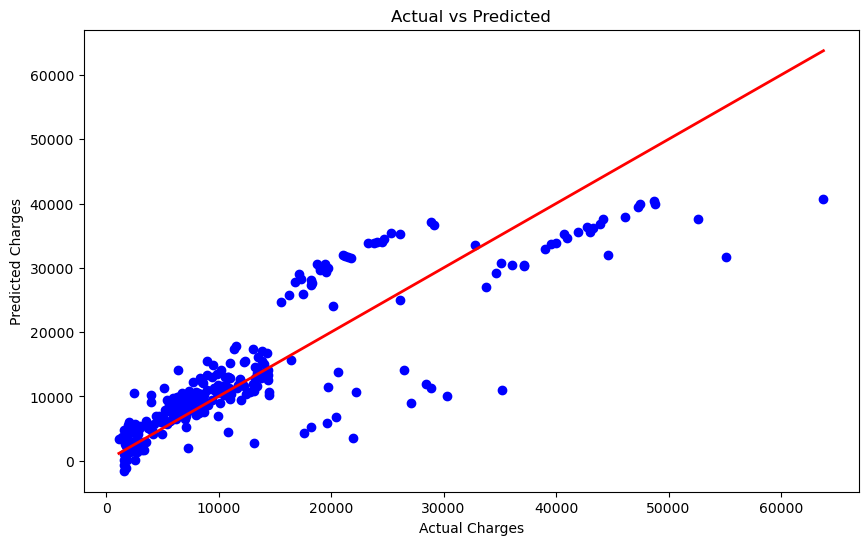

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

## Gradient Boosting Regressor Model

In [18]:
model = GradientBoostingRegressor(n_estimators=100, random_state=417)

In [19]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=417)

In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8647420561416497


In [22]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

           Actual     Predicted
146   40720.55105  42490.701415
1238   6985.50695   7600.925752
97    10226.28420  14858.293390
812   11013.71190  12653.155027
733    9447.25035  11613.886022
444   26109.32905  24849.665724
499   13470.86000  14083.548732
933    7348.14200  10261.197554
762   19040.87600  22075.691650
1271   3021.80915   5049.084448


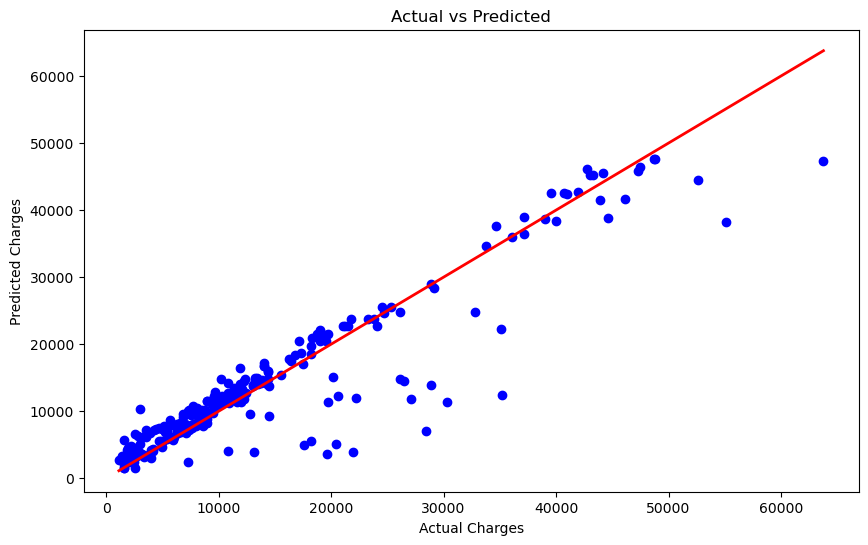

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()